In [1]:
from basereduce.prompt_generation.prompt_generator import LMPromptGenerator, LMName
from basereduce.image_generation.image_generator import (
    StableDiffusionImageGenerator,
    GenModelName,
)
from basereduce.dataset_annotation import OWLv2Annotator, ModelName, TaskList

import matplotlib.pyplot as plt
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


/home/paperspace/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-22 18:52:10.965111: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Prompt generation

In [2]:
object_names = ["aeroplane", "bicycle", "bird", "boat"]
prompt_generator = LMPromptGenerator(
    class_names=object_names, model_name=LMName.MISTRAL, prompts_number=10
)

Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.08s/it]


In [3]:
generated_prompts = prompt_generator.generate_prompts()
print(generated_prompts)

 20%|█████████████████████████████████████████████████████████▌                                                                                                                                                                                                                                      | 2/10 [00:02<00:10,  1.26s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
 30%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                         | 3/10 [00:05<00:13,  1.87s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
 90%|███████████████████████████████████████████████████████████████████████████

['A photo of an aeroplane taking off with the sun setting in the background.', 'A photo of an aeroplane taking off from a runway surrounded by lush green trees and the blue sky in the background.', 'A photo of bicycle, boat, and aeroplane: a tranquil journey across the vast expanse of the open sea.', 'A photo of a bicycle used to transport groceries, highlighting the sustainable lifestyle of a city.', 'A photo of a boat and aeroplane in the sky: surreal meeting of two modes of transportation, suspended mid-air.', 'A soaring aeroplane above the clouds, capturing the essence of freedom in a breathtaking view.', 'A photo of an aeroplane and a boat interacting on a clear sky, flying together above the ocean.', 'A photo of a bicycle, bird perched on the handlebars, and an aeroplane flying overhead, showcasing the joy of adventure.', 'A joyful bird taking flight from a sunlit boat on a tranquil river, surrounded by rolling hills and a beautiful bicycle.', 'Birds and boat sail into horizon to

In [15]:
del prompt_generator
with torch.no_grad():
    torch.cuda.empty_cache()

In [16]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Wed Nov 22 17:55:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Graphics...  On   | 00000000:00:05.0  On |                  Off |
| 41%   35C    P2    45W / 140W |   1926MiB / 16117MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA Graphics...  On   | 00000000:00:07.0 Off |                  Off |
| 41%   

## Image generation

In [17]:
image_generator = StableDiffusionImageGenerator(
    seed=42.0,
    model_name=GenModelName.STABLE_DIFFUSION_XL,
    prompt_prefix="A high-resolution image of ",
    prompt_suffix=" with intricate details.",
    negative_prompt="a low-quality image, blurry details, incorrect anatomy",
)

Loading pipeline components...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.25it/s]


In [18]:
# Generate images using the list of prompts
generated_images = image_generator.generate_images(generated_prompts)

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 46/50 [00:31<00:01,  2.01it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:33<00:00,  1.51it/s]

 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                         | 26/50 [00:14<00:12,  1.99it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

 12%|██████████████████████████████████▌                                                                                                                                                                                                                                                             | 6/50 [00:03<00:24,  1.81it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.91it/s]

 20%|█████████████████████████████████████████████████████████▌                                                                                                                                                                                                                                      | 3/15 [00:02<00:08,  1.44it/s]


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 34/50 [00:18<00:08,  1.96it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

 28%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                              | 14/50 [00:07<00:18,  1.95it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 11/15 [00:06<00:02,  1.74it/s]


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 42/50 [00:22<00:04,  1.95it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                | 22/50 [00:11<00:14,  1.95it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

  4%|███████████▌                                                                                                                                                                                                                                                                                    | 2/50 [00:01<00:38,  1.25it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]



 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                  | 30/50 [00:16<00:10,  1.95it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

 20%|█████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                     | 10/50 [00:05<00:20,  1.92it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                         | 7/15 [00:04<00:04,  1.69it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [06:45<00:00, 40.60s/it]


A photo of an aeroplane taking off with the sun setting in the background.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F414C404A00>


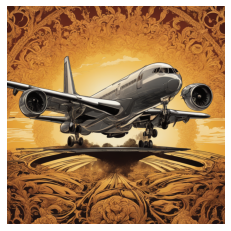

A photo of an aeroplane taking off from a runway surrounded by lush green trees and the blue sky in the background.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4136870E50>


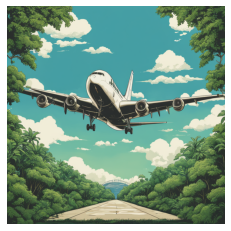

A photo of bicycle, boat, and aeroplane: a tranquil journey across the vast expanse of the open sea.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4092020E50>


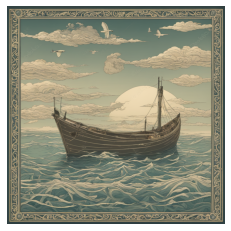

A photo of a bicycle used to transport groceries, highlighting the sustainable lifestyle of a city.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F408FFCA580>


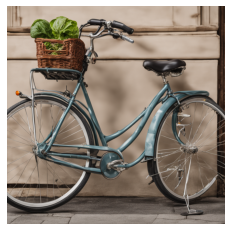

A photo of a boat and aeroplane in the sky: surreal meeting of two modes of transportation, suspended mid-air.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F408FFD0A30>


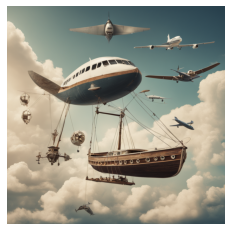

A soaring aeroplane above the clouds, capturing the essence of freedom in a breathtaking view.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4088CA4040>


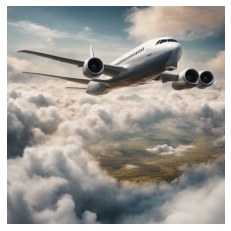

A photo of an aeroplane and a boat interacting on a clear sky, flying together above the ocean.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4088C8E490>


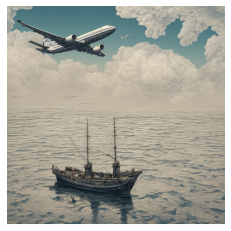

A photo of a bicycle, bird perched on the handlebars, and an aeroplane flying overhead, showcasing the joy of adventure.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4088B096A0>


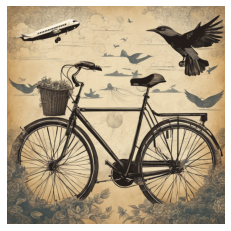

A joyful bird taking flight from a sunlit boat on a tranquil river, surrounded by rolling hills and a beautiful bicycle.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4088A4A2B0>


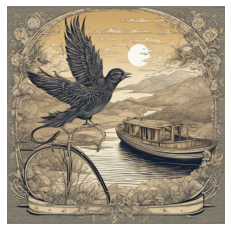

Birds and boat sail into horizon together, as an aeroplane flies overhead.
<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4088A717C0>


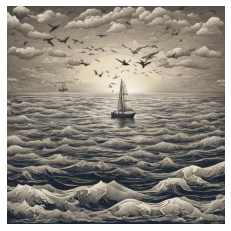

In [25]:
for img, prompt in zip(generated_images, generated_prompts):
    print(prompt)
    plt.imshow(img)
    print(img)
    plt.axis("off")  # Hide the axis
    plt.show()


In [20]:
del image_generator
with torch.no_grad():
    torch.cuda.empty_cache()

In [21]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Wed Nov 22 18:02:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Graphics...  On   | 00000000:00:05.0  On |                  Off |
| 62%   74C    P2    58W / 140W |   2536MiB / 16117MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA Graphics...  On   | 00000000:00:07.0 Off |                  Off |
| 41%   

In [28]:
annotator = OWLv2Annotator(
    seed=42,
    model_name=ModelName.OWL_V2,
    task_definition=TaskList.OBJECT_DETECTION,
    device="cuda",  # Use "cuda" for GPU or "cpu" for CPU
)

Box: [  1.8863525 230.9204    550.2044    537.48553  ], Score: 0.5825206637382507, Label: aeroplane
Box: [380.16742 257.45038 969.53314 536.59937], Score: 0.5160300731658936, Label: aeroplane


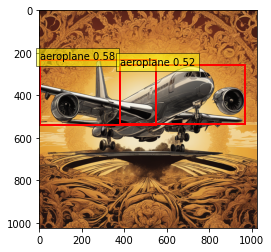

Box: [ 34.132355 282.70712  701.94165  536.86084 ], Score: 0.7031378149986267, Label: aeroplane


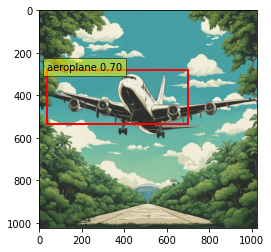

Box: [685.31165 109.16142 761.8347  152.37508], Score: 0.5351011157035828, Label: aeroplane
Box: [509.72162 509.7801  821.50714 712.38727], Score: 0.5781499147415161, Label: boat


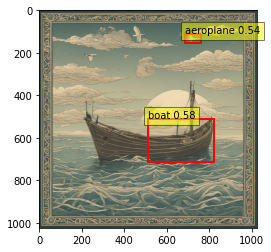

Box: [ 316.7221    54.18622 1033.793    750.28613], Score: 0.6383808851242065, Label: bicycle


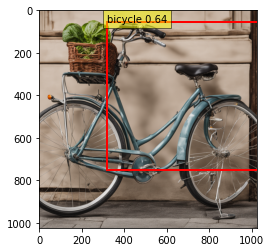

Box: [597.6528  126.59897 981.14105 209.48874], Score: 0.55870121717453, Label: aeroplane
Box: [ 650.18555  268.60953 1004.5901   363.2863 ], Score: 0.559302806854248, Label: aeroplane
Box: [631.42615 398.95    772.6113  453.37982], Score: 0.5367498993873596, Label: aeroplane
Box: [762.31573 524.70074 880.73065 581.46246], Score: 0.523302435874939, Label: aeroplane


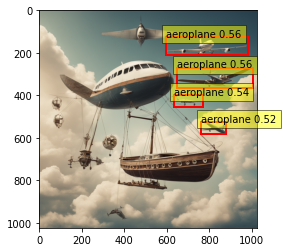

Box: [ 39.938934 172.84254  864.1924   425.84363 ], Score: 0.7828495502471924, Label: aeroplane


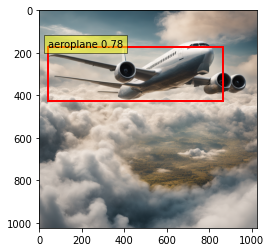

Box: [ 49.85733  63.34475 506.6143  236.90118], Score: 0.5600862503051758, Label: aeroplane
Box: [531.7458  131.74803 571.653   154.3936 ], Score: 0.5483037233352661, Label: aeroplane
Box: [888.08765 270.45673 899.7854  285.35938], Score: 0.5408562421798706, Label: bird
Box: [475.313   752.35205 624.3828  883.3086 ], Score: 0.5223590135574341, Label: boat


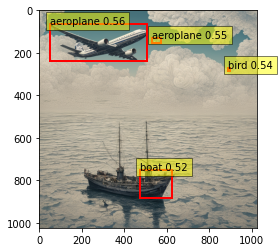

Box: [564.7139    57.662525 590.84296   79.83833 ], Score: 0.5758901834487915, Label: bird
Box: [ 19.979767  62.10365  342.3333   180.37703 ], Score: 0.6268771290779114, Label: aeroplane
Box: [535.1089  148.5288  565.2114  164.57652], Score: 0.5373862981796265, Label: bird
Box: [ 653.02936    43.628876 1018.7376    327.19418 ], Score: 0.5162245631217957, Label: bird
Box: [500.31393 182.15833 532.1871  198.25839], Score: 0.5021936297416687, Label: bird
Box: [532.4564  204.70802 686.3871  273.9634 ], Score: 0.5503495931625366, Label: bird
Box: [ 834.65656  386.78458 1022.1258   481.04355], Score: 0.5105529427528381, Label: bird
Box: [ 23.52156 503.61243 516.24695 926.98706], Score: 0.5581904053688049, Label: bicycle


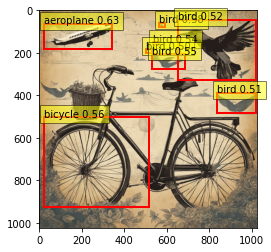

Box: [ 79.80032   32.595367 546.9309   536.6599  ], Score: 0.5106748938560486, Label: bird
Box: [ 15.480362 516.468    500.40704  998.50366 ], Score: 0.5297632217407227, Label: bicycle
Box: [521.60913 533.81354 992.6669  724.29816], Score: 0.6407570242881775, Label: boat
Box: [ 506.95593  798.57904 1003.3938   989.555  ], Score: 0.5693117380142212, Label: boat


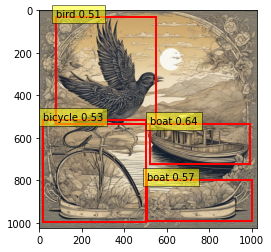

Box: [147.94797     6.4772224 180.57123    26.400768 ], Score: 0.5099656581878662, Label: bird
Box: [8.0276581e+02 4.8003197e-02 8.4040082e+02 2.2109383e+01], Score: 0.504256010055542, Label: bird
Box: [283.66443   17.289244 322.3504    38.871216], Score: 0.5494634509086609, Label: bird
Box: [438.4853     7.554228 468.89093   32.387527], Score: 0.5540779232978821, Label: bird
Box: [945.42914   17.608698 980.83356   40.013817], Score: 0.5170560479164124, Label: bird
Box: [189.60506  78.66727 250.42348 127.78543], Score: 0.5759935975074768, Label: bird
Box: [ 22.856304 120.14149   36.83292  138.46017 ], Score: 0.500443696975708, Label: bird
Box: [167.95503 147.76274 222.49217 190.0579 ], Score: 0.5178585052490234, Label: bird
Box: [234.17392 143.80586 297.50308 176.52824], Score: 0.5040385127067566, Label: bird
Box: [808.1676  152.24727 826.28674 168.3499 ], Score: 0.5453292727470398, Label: bird
Box: [ 75.02711 164.76218 103.80691 184.18643], Score: 0.5110556483268738, Label: bird
Box: 

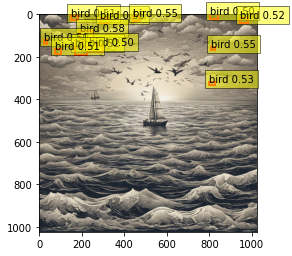

In [32]:
boxes_list = []
scores_list = []
labels_list = []


for image in generated_images:
    # Define prompts to guide the detection
    prompts = object_names

    # Perform object detection
    boxes, scores, labels = annotator.annotate(image, prompts, conf_threshold=0.5)

    # Convert to numpy arrays
    boxes = boxes.detach().cpu().numpy()
    scores = scores.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    boxes_list.append(boxes)
    scores_list.append(scores)
    labels_list.append(labels)

    # Process the results
    for box, score, label in zip(boxes, scores, labels):
        print(f"Box: {box}, Score: {score}, Label: {prompts[label]}")
        
    fig, ax = plt.subplots(1)
    ax.imshow(image)
        
    for box, score, label in zip(boxes, scores, labels):
    # Each box is (x1, y1, x2, y2)
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle(
            (x1, y1), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        plt.text(
            x1,
            y1,
            f"{prompts[label]} {score:.2f}",
            bbox=dict(facecolor="yellow", alpha=0.5),
        )

    plt.show()

## Dataset creation and saving

In [1]:
!python3 --version

Python 3.10.13


In [23]:
!pip uninstall albumentations -y

Found existing installation: albumentations 1.3.1
Uninstalling albumentations-1.3.1:
  Successfully uninstalled albumentations-1.3.1


In [26]:
!pip install git+https://github.com/i-aki-y/albumentations.git@c137e2 --no-cache-dir

  Cloning https://github.com/i-aki-y/albumentations.git (to revision c137e2) to /tmp/pip-req-build-duypccza
  Running command git clone --filter=blob:none --quiet https://github.com/i-aki-y/albumentations.git /tmp/pip-req-build-duypccza
  Running command git checkout -q c137e2
  Resolved https://github.com/i-aki-y/albumentations.git to commit c137e2
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import glob, json, os
import numpy as np
import cv2
from copy import deepcopy
from tqdm import tqdm
import matplotlib.pyplot as plt

from luxonis_ml.data import *
from luxonis_ml.enums import LabelType

In [18]:
dataset_name = "basereduce_test1"
#if LuxonisDataset.exists(dataset_name):
    #print("Dataset exists")
dataset = LuxonisDataset(dataset_name)
dataset.delete_dataset()

In [4]:
save_dir = 'generated_images'

In [41]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save images and create paths
img_paths = []
for i, img in enumerate(generated_images):
    path = os.path.join(save_dir, f'image_{i}.jpg')
    img.save(path)
    img_paths.append(path)

In [66]:
def save_to_json(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

# Save boxes_list and labels_list as JSON files
save_to_json([sub.tolist() for sub in boxes_list], os.path.join(save_dir, 'boxes_list.json'))
save_to_json([sub.tolist() for sub in labels_list], os.path.join(save_dir, 'labels_list.json'))
save_to_json(object_names, os.path.join(save_dir, 'object_names.json'))

In [5]:
def load_from_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Load the data back into Python lists
boxes_list = load_from_json(os.path.join(save_dir, 'boxes_list.json'))
labels_list = load_from_json(os.path.join(save_dir, 'labels_list.json'))
object_names = load_from_json(os.path.join(save_dir, 'object_names.json'))

In [6]:
img_paths = []
valid_images = [".jpg",".png"]
for f in os.listdir(save_dir):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    img_paths.append(os.path.join(save_dir,f))
img_paths = sorted(img_paths)

In [7]:
def dataset_generator(img_paths, boxes_list, labels_list, label_map):
    
    for path, bboxes, labels in tqdm(zip(img_paths, boxes_list, labels_list)):
        img = cv2.imread(path)
        print(path)
        height, width, _ = img.shape
        
        for bbox, label in zip(bboxes, labels):
            # COCO-specific conversion for bounding boxes
            x, y, w, h = bbox
            label = label_map[label]
            yield {
                "file": path,
                "class": label,
                "type": "box",
                "value": [x/width, y/height, w/width, h/height]
            }

In [19]:
dataset = LuxonisDataset(dataset_name)
dataset.set_classes(object_names)
dataset.add(lambda: dataset_generator(img_paths, boxes_list, labels_list, object_names))


10it [00:00, 105.42it/s]


generated_images/image_0.jpg
generated_images/image_1.jpg
generated_images/image_2.jpg
generated_images/image_3.jpg
generated_images/image_4.jpg
generated_images/image_5.jpg
generated_images/image_6.jpg
generated_images/image_7.jpg
generated_images/image_8.jpg
generated_images/image_9.jpg
Generating UUIDs...
Took 0.009219646453857422 seconds
Saving annotations...


100%|████████████████████████████████████████| 39/39 [00:00<00:00, 48453.16it/s]

Took 0.002605438232421875 seconds


In [20]:
dataset.path

'/home/paperspace/luxonis/luxonis-ml/src/luxonis_ml/data/offline/datasets/basereduce_test1'

In [21]:
dataset.make_splits()


Sample boxes tensor
[[0.         0.58364528 0.12363181 0.95814556 0.20457885]
 [0.         0.63494682 0.26231399 0.98104501 0.35477176]
 [0.         0.6166271  0.38959962 0.75450325 0.44275373]
 [0.         0.74444896 0.51240307 0.86008853 0.56783444]]

{<LabelType.BOUNDINGBOX: 'boxes'>: array([[0.        , 0.58364528, 0.12363181, 0.95814556, 0.20457885],
       [0.        , 0.63494682, 0.26231399, 0.98104501, 0.35477176],
       [0.        , 0.6166271 , 0.38959962, 0.75450325, 0.44275373],
       [0.        , 0.74444896, 0.51240307, 0.86008853, 0.56783444]])}
aeroplane
aeroplane
aeroplane
aeroplane


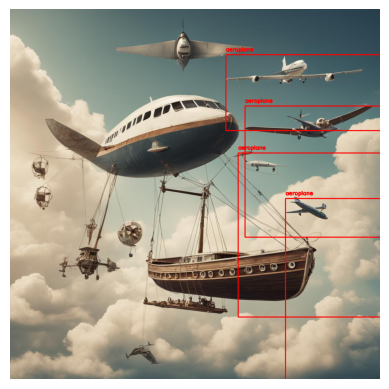

KeyError: False

In [22]:
class_names, _ = dataset.get_classes()
loader = LuxonisLoader(dataset, view="train")
for image, ann in loader:
    #cls = ann[LabelType.CLASSIFICATION]
    box = ann[LabelType.BOUNDINGBOX]
    
    #print("Sample classification tensor")
    #print(cls)
    #print()

    print("Sample boxes tensor")
    print(box)
    print()
    print(ann)


    h, w, _ = image.shape
    for b in box:
        label = class_names[int(b[0])]
        print(label)
        x_min, y_min, box_width, box_height = int(b[1]*w), int(b[2]*h), int(b[3]*w), int(b[4]*h)
        cv2.rectangle(image, (int(b[1]*w),int(b[2]*h)), (int(b[1]*w+b[3]*w),int(b[2]*h+b[4]*h)), (255,0,0), 2)
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    mask_viz = np.zeros((h,w,3)).astype(np.uint8)
    
    plt.imshow(image)
    plt.axis('off')  # Optional: Hide axis
    plt.show()
